In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [143]:
errors=np.random.normal(0,1,400)

In [144]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [145]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [146]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))
series

2019-09-01    48.447247
2019-09-02    50.442729
2019-09-03    50.873380
2019-09-04    52.154891
2019-09-05    48.587147
                ...    
2019-12-28    48.823973
2019-12-29    49.028693
2019-12-30    50.960071
2019-12-31    49.912988
2020-01-01    51.604695
Freq: D, Length: 123, dtype: float64

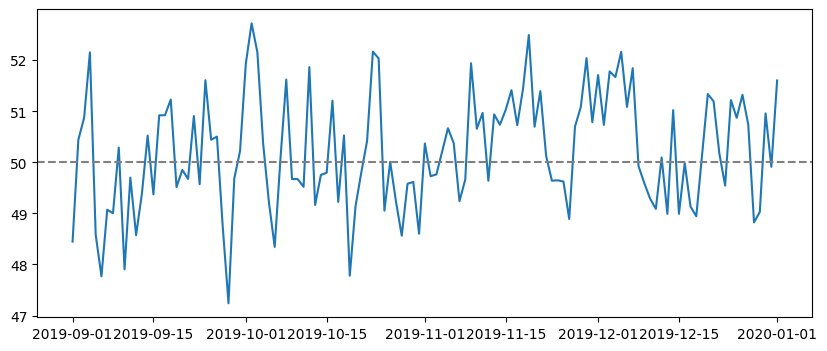

In [147]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [148]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

<BarContainer object of 10 artists>

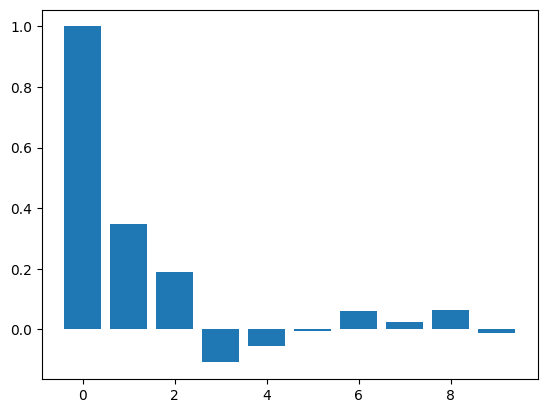

In [149]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

In [150]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [151]:
model = ARIMA(train_data, order=(0,0,3))

In [152]:
model_fit=model.fit()

In [153]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -174.362
Date:                Tue, 02 Jul 2024   AIC                            358.725
Time:                        19:16:51   BIC                            372.704
Sample:                    09-01-2019   HQIC                           364.402
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1985      0.153    328.379      0.000      49.899      50.498
ma.L1          0.3605      0.102      3.530      0.000       0.160       0.561
ma.L2          0.2990      0.100      2.983      0.0

In [154]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [155]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [156]:
residuals = test_data - predictions

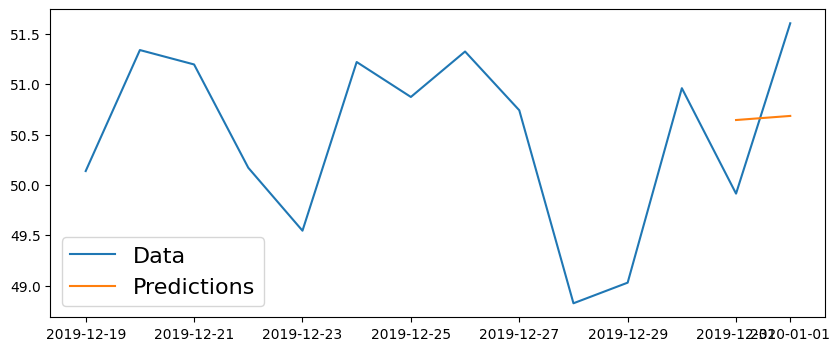

In [157]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [158]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0162
